In [1]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
rcParams.update({'figure.max_open_warning': 0,
                 'font.size': 14,
                 'axes.titlesize': 14,
                 'axes.labelsize': 14,
                 'xtick.direction': 'in',
                 'ytick.direction': 'in',
                 'xtick.labelsize': 12,
                 'ytick.labelsize': 12})

#rcParams.keys() 

In [5]:
pkl_file = open('/home/furkan/data/pods/2020-03-06_11-10-01.pkl', 'rb')
mydata = pickle.load(pkl_file)
mydata

{'Ch1': array([-0.08373858, -0.05380565,  0.02858498, ..., -0.17243614,
        -0.17804231, -0.28065519]),
 'Ch2': array([ 0.06906183,  0.04393419, -0.01973585, ..., -0.228966  ,
        -0.24137966, -0.23797591]),
 'Ch3': array([-0.00531648, -0.03845625, -0.12065489, ..., -0.32880467,
        -0.32790359, -0.24690639]),
 'Ch4': array([-0.09010247, -0.01925287,  0.03618594, ...,  0.10663525,
        -0.04937396, -0.06098208]),
 'Ch5': array([-0.07397974, -0.04616305, -0.05036557, ..., -0.02805218,
        -0.13201456, -0.11660532]),
 'Ch7': array([ 0.03037783,  0.00916298,  0.12354305, ..., -0.08960616,
        -0.00254522, -0.10291548])}

[-0.08412908 -0.08019923 -0.07596306 ... -0.25059913 -0.25376651
 -0.25665504]


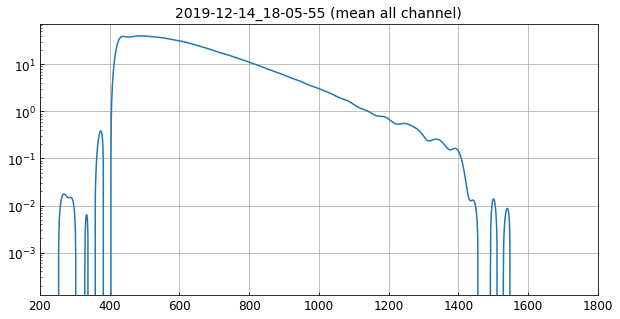

In [6]:
rcParams['figure.figsize'] = 10, 5
mydata['Ch1']
#np.savetxt("meanchannnel.csv", y, delimiter=",")    
b, a = signal.butter(3, 0.05)
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, mydata['Ch1'], zi=zi*mydata['Ch1'][0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, mydata['Ch1'])
t=range(1, len(y) + 1)

print(y)
plt.plot(y)
t = np.arange(len(y))
plt.xlim(200, 1800)
plt.title('2019-12-14_18-05-55 (mean all channel)')
plt.yscale('log')
plt.grid(True)


In [7]:
def model(t, coeffs):
    return (coeffs[0] + coeffs[1]*np.exp(-t*coeffs[2]))
x0 = np.array([300, -3000 , -0.000001], dtype=float)
print(x0)

[ 3.e+02 -3.e+03 -1.e-06]


In [8]:
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

In [9]:
from scipy.optimize import leastsq
x, flag = leastsq(residuals, x0,
                  args=(y[500:1000:1],
                        t[500:1000:1]))
print(x)

[ 2.15862519e+05 -2.15783908e+05 -3.75300123e-07]


/home/furkan/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


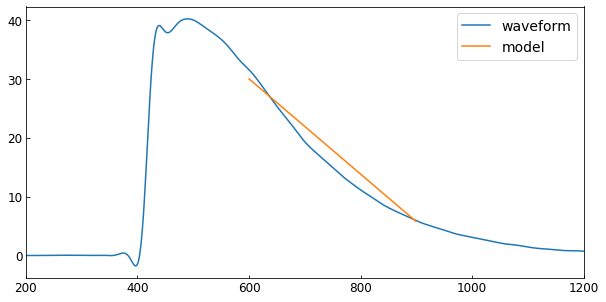

In [10]:
plt.plot(t, y, t[600:900:1], model( t[600:900:1], x)) 
plt.legend(['waveform', 'model']) 
#plt.yscale('log')
plt.xlim(200, 1200)
#plt.ylim(0.01, 100)
plt.show()



In [15]:
def model2(t, coeffs):
    return (coeffs[0] + coeffs[1]*np.exp(-(x-coeffs[1])/coeffs[2]) + coeffs[3] *np.exp(-(x-coeffs[1])/coeffs[4]) + coeffs[5]*np.exp(-(x-coeffs[1])/coeffs[6]))

x0 = np.array([985, 2 ,780 , -4, 670, 100, 1], dtype=float)

In [16]:
x, flag = leastsq(residuals, x0,
                  args=(y[500:1000:1],
                        t[500:1000:1]))
#print(x0)
print(x)


[ 17.90263773   2.         780.          -4.         670.
 100.           1.        ]


ValueError: x and y must have same first dimension, but have shapes (500,) and (7,)

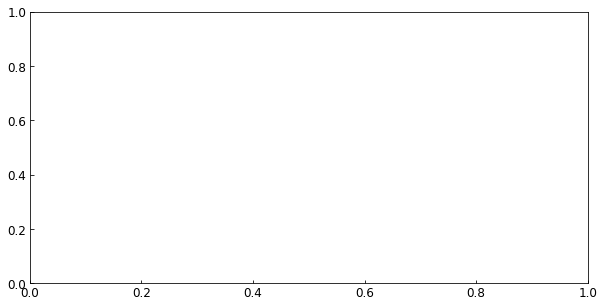

In [19]:
plt.plot(t, y, t[500:1000:1], model2( t[500:1000:1], x)) 
plt.legend(['waveform', 'model']) 
plt.yscale('log')
plt.xlim(200, 2000)
plt.ylim(0.01, 100)
plt.show()
